In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy as sci
import math as ma

In [2]:
dataset2 = pd.read_json("./../Data/Band/HEB1/merged_file_acc.json")
dataset2_g = pd.read_json("./../Data/Band/HEB1/merged_file_gyro.json")
dataset2_h = pd.read_json("./../Data/Band/HEB1/merged_file_heart.json")
dataset2_t = pd.read_json("./../Data/Band/HEB1/merged_file_skin.json")
dataset2_s = pd.read_json("./../Data/Band/HEB1/merged_file_speed.json")

dataset2 = dataset2.sort_values(by='Timestamp') 
dataset2['Timestamp'] = dataset2['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2 = dataset2[[5,6,7,8]]

dataset2_g = dataset2_g.sort_values(by='Timestamp') 
dataset2_g['Timestamp'] = dataset2_g['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_g = dataset2_g[[1,2,3,8]]

dataset_f2 = dataset2.merge(dataset2_g,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_h = dataset2_h.sort_values(by='Timestamp') 
dataset2_h['Timestamp'] = dataset2_h['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_h = dataset2_h[[6,3]]

dataset_f2 = dataset_f2.merge(dataset2_h,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_t = dataset2_t.sort_values(by='Timestamp') 
dataset2_t['Timestamp'] = dataset2_t['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_t = dataset2_t[[6,5]]

dataset_f2 = dataset_f2.merge(dataset2_t,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_s = dataset2_s.sort_values(by='Timestamp')
dataset2_s['Timestamp'] = dataset2_s['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_s = dataset2_s[[7,5]]
dataset_f2 = dataset_f2.merge(dataset2_s,how='left', left_on='Timestamp', right_on='Timestamp')

dataset_f2 = dataset_f2.fillna(method='bfill')
dataset_f2 = dataset_f2.fillna(method='pad')

dataset_f2

,Timestamp,X,Y,Z,AngularX,AngularY,AngularZ,HeartRate,Temperature,KPH
0,2016-10-14 18:08:46,-0.996094,0.007324,-0.020508,0.396341,-0.396341,0.030488,84.0,31.059999,18.847331
1,2016-10-14 18:08:47,-0.998047,0.008057,-0.024170,0.365854,-0.365854,0.000000,84.0,31.059999,18.847331
2,2016-10-14 18:08:48,-0.994141,0.008545,-0.021973,0.426829,-0.396341,0.030488,84.0,31.059999,18.847331
3,2016-10-14 18:08:49,-0.999023,0.008545,-0.023682,0.396341,-0.426829,0.060976,84.0,31.370001,18.847331
4,2016-10-14 18:08:50,-0.992432,0.010498,-0.021729,0.426829,-0.426829,0.000000,84.0,31.370001,18.847331
5,2016-10-14 18:08:51,-0.993408,0.009766,-0.023926,0.396341,-0.457317,-0.030488,84.0,31.370001,18.847331
6,2016-10-14 18:08:52,-0.997070,0.009277,-0.022949,0.396341,-0.396341,0.030488,84.0,31.370001,18.847331
7,2016-10-14 18:08:53,-1.001221,0.007568,-0.024414,0.335366,-0.365854,0.091463,84.0,31.370001,18.847331
8,2016-10-14 18:08:54,-0.992676,0.009521,-0.023193,0.457317,-0.457317,0.000000,84.0,31.370001,18.847331
9,2016-10-14 18:08:55,-0.992920,0.007568,-0.023682,0.396341,-0.426829,0.060976,84.0,31.370001,18.847331


In [3]:
data = dataset_f2.as_matrix();
#data = data[500:1269]
data.shape

(4633, 10)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

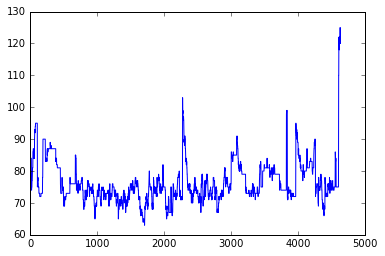

In [5]:
plt.plot(data[:,7])

In [6]:
ax_2 = data[:,1];
ay_2 = data[:,2];
az_2 = data[:,3];
gx_2 = data[:,4];
gy_2 = data[:,5];
gz_2 = data[:,6];
h_2 = data[:,7];
t_2 = data[:,8];
s_2 = data[:,9]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(ax_1[0:100])
#plt.show()

In [8]:
d2 = np.mean(data[:,1:4]**2, axis = 1);
d2

array([0.33089232444763184, 0.33224888642628997, 0.3296237985293071, ...,
       0.3576857844988505, 0.32111138105392456, 0.36683539549509686], dtype=object)

In [9]:
d2.shape

(4633,)

In [10]:
rms_acc_2 = []
for i in range (0, len(d2)):
    
    rms_acc_2.append(ma.sqrt(d2[i]));

In [11]:
#rms_acc_2

In [12]:
w = signal.medfilt(rms_acc_2);

acc_x_2 = signal.medfilt(ax_2);
acc_y_2 = signal.medfilt(ay_2);
acc_z_2 = signal.medfilt(az_2);

Num_taps = 10;
a = signal.firwin(Num_taps, cutoff = 0.001, window = "boxcar");

g_x_2 = signal.convolve(gx_2, a, mode='full');
g_y_2 = signal.convolve(gy_2, a, mode='full');
g_z_2 = signal.convolve(gz_2, a, mode='full');

In [13]:
frame = 50;
stepsize = 25;
vr2 = [];
mn2 = [];
    
vr_acc_x_2 = []
vr_acc_y_2 = []
vr_acc_z_2 = []


rms_acc_x_2 = []
rms_acc_y_2 = []
rms_acc_z_2 = []


# vr1 = variance of rms acc1
# vr2 = variance of rms acc2
# mn1 = mean of rms acc1
# mn2 = mean of rms ac c1

mn_acc_x_2 = []

mn_acc_y_2 = []

mn_acc_z_2 = []

mn_g_x_2 = []

mn_g_y_2 = []

mn_g_z_2 = []

vr_g_x_2 = []

vr_g_y_2 = []

vr_g_z_2 = []

rms_g_x_2 = []

rms_g_y_2 = []

rms_g_z_2 = []

mn_h_2 = []

mn_t_2 = []

mn_s_2 = []


#vr_acc_x_1
#vr_acc_y_1
#vr_acc_z_1

#mn_acc_x_1
#mn_acc_y_1
#mn_acc_z_1


#vr_acc_x_2
#vr_acc_y_2
#vr_acc_z_2

#mn_acc_x_2
#mn_acc_y_2
#mn_acc_z_2    

In [14]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    var_acc_x_2 = np.var(dt, axis = 0)
    var_acc_y_2 = np.var(dt2, axis = 0)
    var_acc_z_2 = np.var(dt3, axis = 0)
    
    vr_acc_x_2.append(var_acc_x_2);
    vr_acc_y_2.append(var_acc_y_2);
    vr_acc_z_2.append(var_acc_z_2);
        
    

In [15]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    mean_acc_x_2 = np.mean(dt, axis = 0)
    mean_acc_y_2 = np.mean(dt2, axis = 0)
    mean_acc_z_2 = np.mean(dt3, axis = 0)
    
    mn_acc_x_2.append(mean_acc_x_2);
    mn_acc_y_2.append(mean_acc_y_2);
    mn_acc_z_2.append(mean_acc_z_2);
      

In [16]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    
    rm_acc_x_2 = np.mean(dt**2, axis = 0)
    rm_acc_y_2 = np.mean(dt2**2, axis = 0)
    rm_acc_z_2 = np.mean(dt3**2, axis = 0)
    
    rms_acc_x_2.append(ma.sqrt(rm_acc_x_2));
    rms_acc_y_2.append(ma.sqrt(rm_acc_y_2));
    rms_acc_z_2.append(ma.sqrt(rm_acc_z_2));
    

In [17]:
for count in range (0,len(acc_x_2), stepsize):
    dt2 = w[count:count + frame];
    var2 = np.var(dt2, axis = 0);
    mean2 = np.mean(dt2, axis = 0);
    
    vr2.append(var2);
    mn2.append(mean2);

In [18]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = gx_2[cnt:cnt+frame];
    dt2 = gy_2[cnt:cnt+frame];
    dt3 = gz_2[cnt:cnt+frame];
    dt4 = h_2[cnt:cnt+frame];
    dt5 = t_2[cnt:cnt+frame];
    dt6 = s_2[cnt:cnt+frame];
    
    mean_gx_2 = np.mean(dt, axis = 0)
    mean_gy_2 = np.mean(dt2, axis = 0)
    mean_gz_2 = np.mean(dt3, axis = 0)
    mean_h_2 = np.mean(dt4, axis = 0)
    mean_t_2 = np.mean(dt5, axis = 0)
    mean_s_2 = np.mean(dt6, axis = 0)
    
    var_gx_2 = np.var(dt, axis = 0)
    var_gy_2 = np.var(dt2, axis = 0)
    var_gz_2 = np.var(dt3, axis = 0)
    
    vr_g_x_2.append(var_gx_2);
    vr_g_y_2.append(var_gy_2);
    vr_g_z_2.append(var_gz_2);
    
    rm_g_x_2 = np.mean(dt**2, axis = 0)
    rm_g_y_2 = np.mean(dt2**2, axis = 0)
    rm_g_z_2 = np.mean(dt3**2, axis = 0)
    
    rms_g_x_2.append(ma.sqrt(rm_g_x_2));
    rms_g_y_2.append(ma.sqrt(rm_g_y_2));
    rms_g_z_2.append(ma.sqrt(rm_g_z_2));
    
    mean_h_2 = np.mean(dt4, axis = 0)
    mean_t_2 = np.mean(dt5, axis = 0)
    mean_s_2 = np.mean(dt6, axis = 0)
    
    
    mn_g_x_2.append(mean_gx_2);
    mn_g_y_2.append(mean_gy_2);
    mn_g_z_2.append(mean_gz_2);
    mn_h_2.append(mean_h_2);
    mn_t_2.append(mean_t_2);
    mn_s_2.append(mean_s_2);
    

In [19]:
a = np.zeros((len(mn_acc_x_2),), dtype=np.int)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
data_frame_features = np.column_stack((mn_acc_x_2, mn_acc_y_2,mn_acc_z_2,vr_acc_x_2, vr_acc_y_2,vr_acc_z_2,rms_acc_x_2,rms_acc_y_2,rms_acc_z_2,mn2,vr2,mn_g_x_2,mn_g_y_2,mn_g_z_2,vr_g_x_2,vr_g_y_2,vr_g_z_2,rms_g_x_2,rms_g_y_2,rms_g_z_2,mn_h_2,mn_t_2,mn_s_2,a))

In [21]:
data_frame_features.shape

(186, 24)

In [22]:
np.savetxt('heb1.txt',data_frame_features)

In [20]:
#check_f = np.loadtxt('f.txt')

In [21]:
#check_f.shape